# Load libraries

In [9]:
import pandas as pd
import numpy as np
import pandas_profiling
from sklearn.decomposition import PCA,TruncatedSVD
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.manifold import TSNE
from pandas.tools.plotting import andrews_curves
import os
from pandas.tools.plotting import parallel_coordinates
from pandas.tools.plotting import radviz

In [10]:
plt.style.use('ggplot')

%matplotlib inline

In [11]:
os.chdir('/home/py/Smart_cube/')

In [12]:
df = pd.read_csv('cs-trainig-missing-filled.csv')

In [13]:
df.rename(columns={df.columns[0]:'id'}, inplace=True)

In [14]:
df.head(5)

id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0   0                 1                              0.766127   45   
1   1                 0                              0.957151   40   
2   2                 0                              0.658180   38   
3   3                 0                              0.233810   30   
4   4                 0                              0.907239   49   

   NumberOfTime3059DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                    2   0.802982         9120.0   
1                                    0   0.121876         2600.0   
2                                    1   0.085113         3042.0   
3                                    0   0.036050         3300.0   
4                                    1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime6089DaysPastDueNotWorse  \
0                             6                                    0   
1                             0                                    0   
2                             0                                    0   
3                             0                                    0   
4                             1                                    0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0

In [7]:
pandas_profiling.ProfileReport(df)

In [13]:
df.groupby("SeriousDlqin2yrs").count()[['id']]/len(df)

id
SeriousDlqin2yrs         
0                 0.93316
1                 0.06684

In [20]:
df_sample = df.sample(frac=0.01)

/home/py/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

'pandas.tools.plotting.andrews_curves' is deprecated, import 'pandas.plotting.andrews_curves' instead.



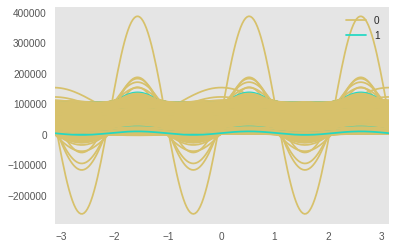

In [19]:
andrews_curves(df_sample, 'SeriousDlqin2yrs')
plt.show()

/home/py/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.



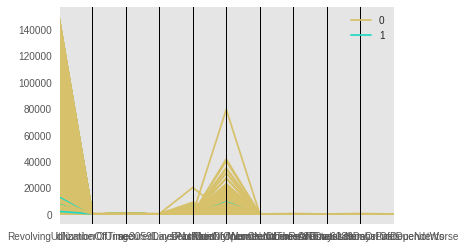

In [21]:
parallel_coordinates(df_sample, "SeriousDlqin2yrs")

/home/py/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

'pandas.tools.plotting.radviz' is deprecated, import 'pandas.plotting.radviz' instead.



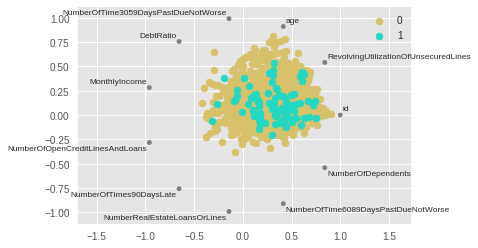

In [22]:
radviz(df_sample, "SeriousDlqin2yrs")

In [23]:
tsne = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=300,
    verbose=2,
    angle=0.5
)

In [24]:
# 17.2 Next, t-sne of titanic data
tsne_results = tsne.fit_transform(df_sample.iloc[:, 1:], df_sample.iloc[:, 0:])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 14.252247
[t-SNE] Iteration 25: error = 1.4182839, gradient norm = 0.0143020
[t-SNE] Iteration 50: error = 1.3549539, gradient norm = 0.0171597
[t-SNE] Iteration 75: error = 1.1316415, gradient norm = 0.0078395
[t-SNE] Iteration 100: error = 1.0925820, gradient norm = 0.0113311
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.092582
[t-SNE] Iteration 125: error = 1.0561056, gradient norm = 0.0064697
[t-SNE] Iteration 150: error = 1.0282770, gradient norm = 0.0114309
[t-SNE] Iteration 175: error = 0.9850081, gradient norm = 0.0111793
[t-SNE] Iteration 200: error = 0.9456345, gradient norm = 0.0110935
[t-SNE] Iteration 225: error = 0.9100328, gradient norm = 0.0106263
[t-SNE] Iteration 250: error = 0.8920029, gradient norm = 0.0103259
[t

In [25]:
trace1 = go.Scatter3d(
    x=tsne_results[:,0],
    y=tsne_results[:,1],
    z=tsne_results[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = df['SeriousDlqin2yrs'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='test')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

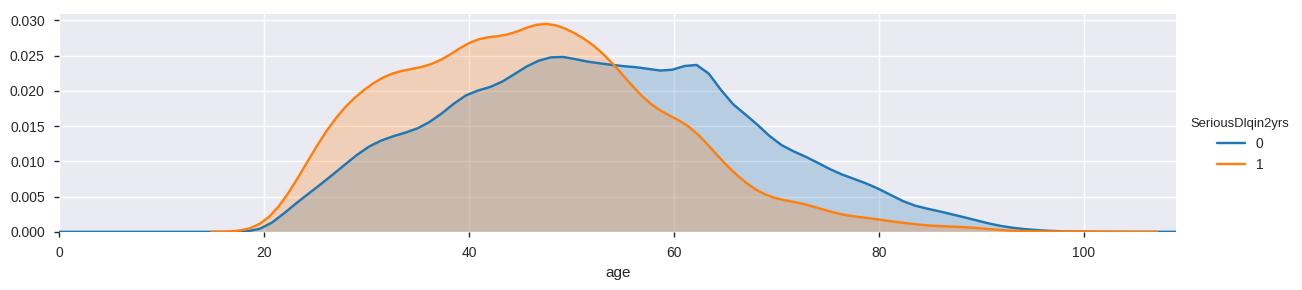

In [22]:
facet = sns.FacetGrid(df, hue="SeriousDlqin2yrs",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, df['age'].max()))
facet.add_legend()

In [10]:
df.head(5)

id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0   0                 1                              0.766127   45   
1   1                 0                              0.957151   40   
2   2                 0                              0.658180   38   
3   3                 0                              0.233810   30   
4   4                 0                              0.907239   49   

   NumberOfTime3059DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                    2   0.802982         9120.0   
1                                    0   0.121876         2600.0   
2                                    1   0.085113         3042.0   
3                                    0   0.036050         3300.0   
4                                    1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime6089DaysPastDueNotWorse  \
0                             6                                    0   
1                             0                                    0   
2                             0                                    0   
3                             0                                    0   
4                             1                                    0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0

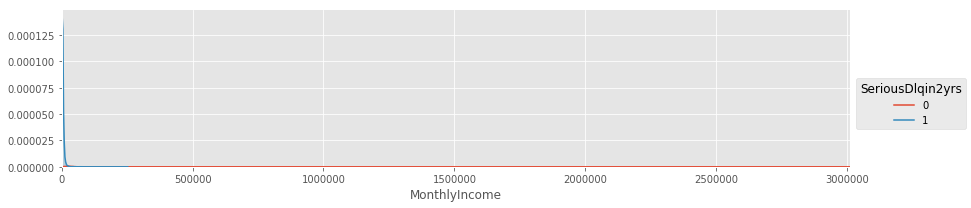

In [11]:
facet = sns.FacetGrid(df, hue="SeriousDlqin2yrs",aspect=4)
facet.map(sns.kdeplot,'MonthlyIncome',shade= True)
facet.set(xlim=(0, df['MonthlyIncome'].max()))
facet.add_legend()

In [12]:
df.columns

Index([u'id', u'SeriousDlqin2yrs', u'RevolvingUtilizationOfUnsecuredLines',
       u'age', u'NumberOfTime3059DaysPastDueNotWorse', u'DebtRatio',
       u'MonthlyIncome', u'NumberOfOpenCreditLinesAndLoans',
       u'NumberOfTimes90DaysLate', u'NumberRealEstateLoansOrLines',
       u'NumberOfTime6089DaysPastDueNotWorse', u'NumberOfDependents'],
      dtype='object')

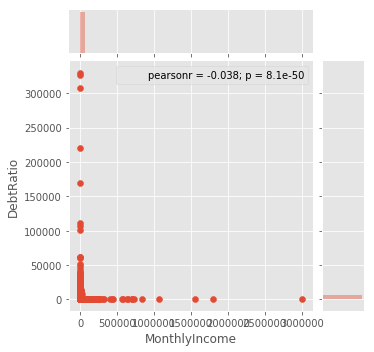

In [14]:
sns.jointplot(x="MonthlyIncome", y="DebtRatio", data=df, size=5)

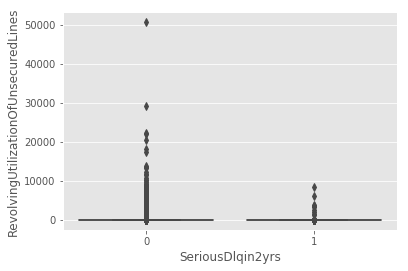

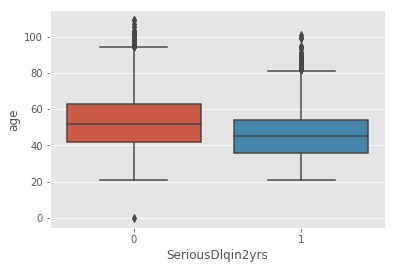

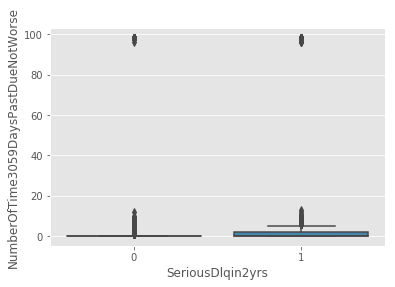

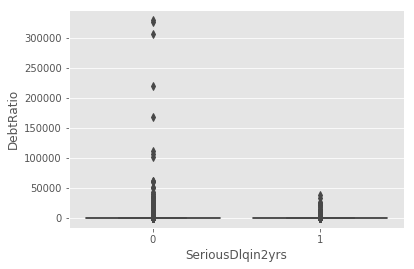

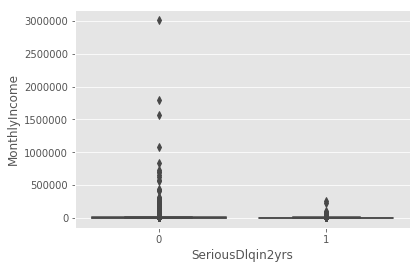

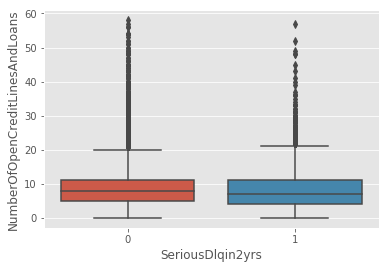

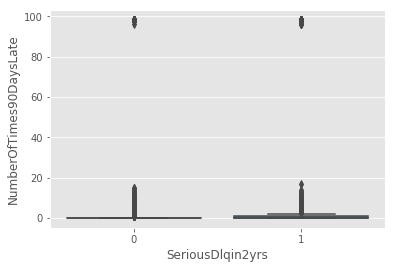

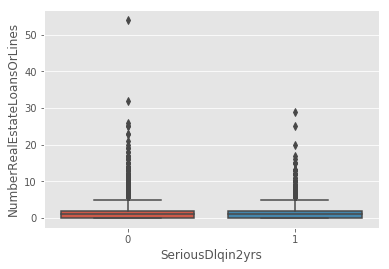

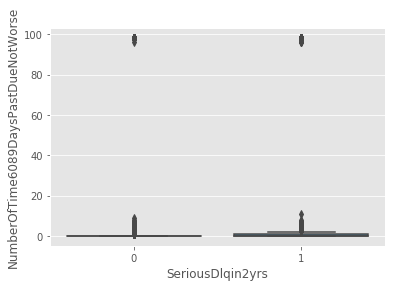

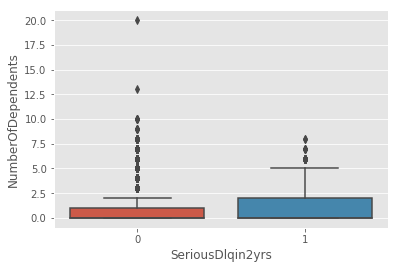

In [15]:
for f in [_ for _ in df.columns if _ not in ['id','SeriousDlqin2yrs']]:
    sns.boxplot(x="SeriousDlqin2yrs", y=f, data=df.fillna(-1))
    plt.show()

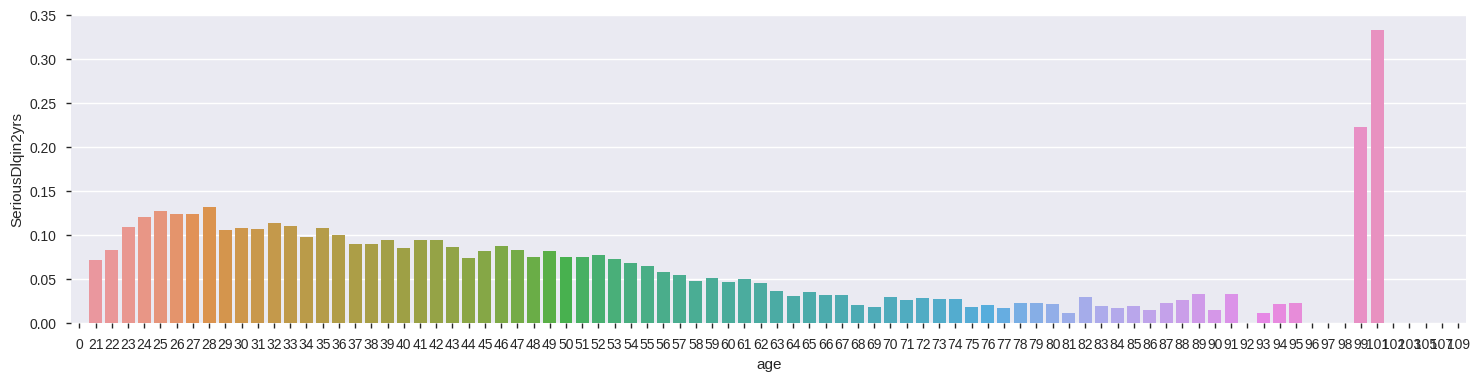

In [24]:
# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = df[["age", "SeriousDlqin2yrs"]].groupby(['age'],as_index=False).mean()
sns.barplot(x='age', y='SeriousDlqin2yrs', data=average_age)

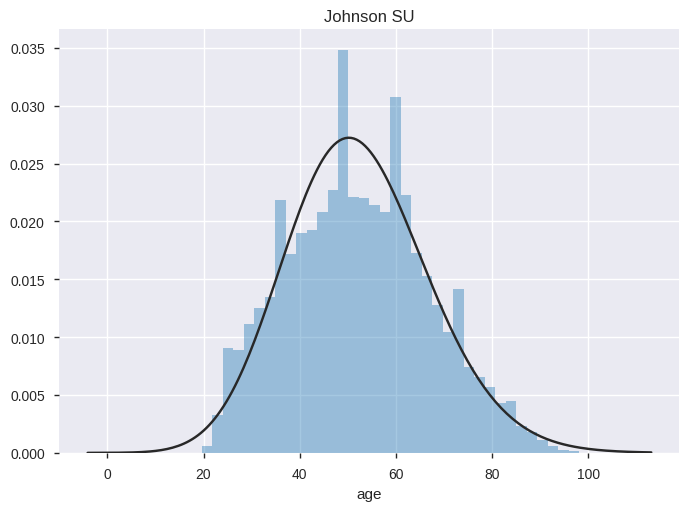

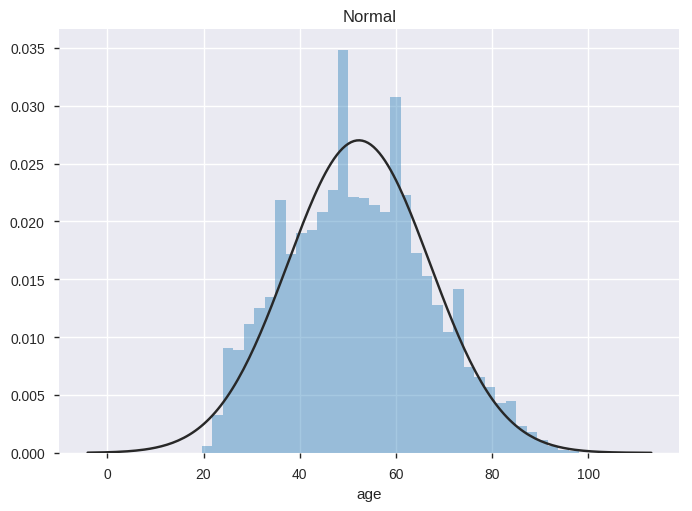

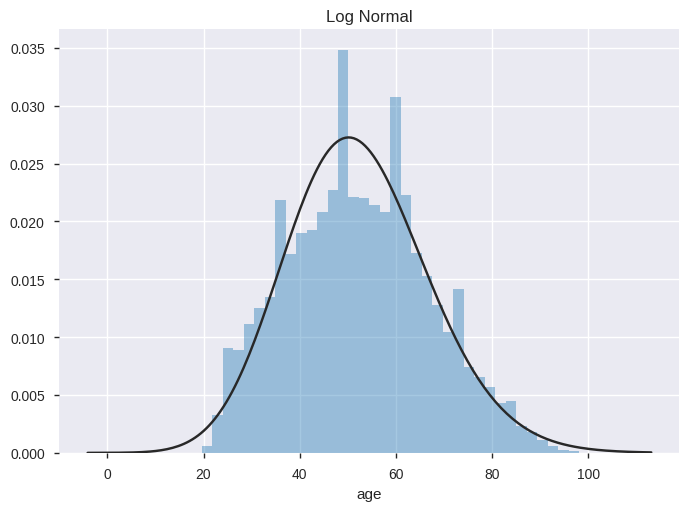

In [26]:
import scipy.stats as st
y = df['age']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

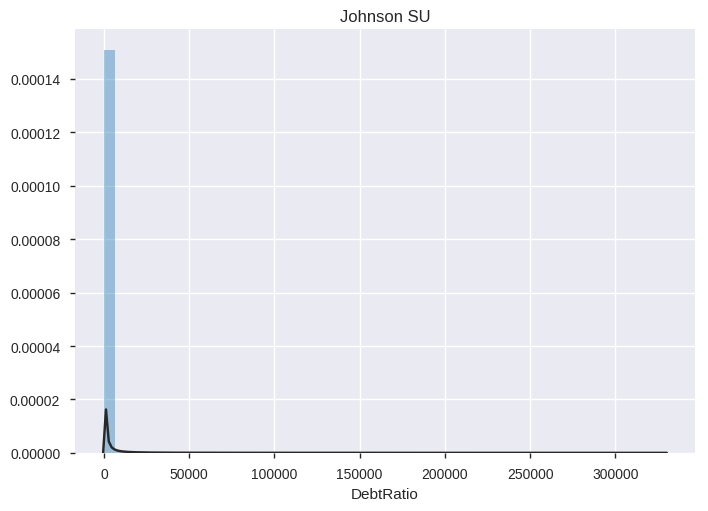

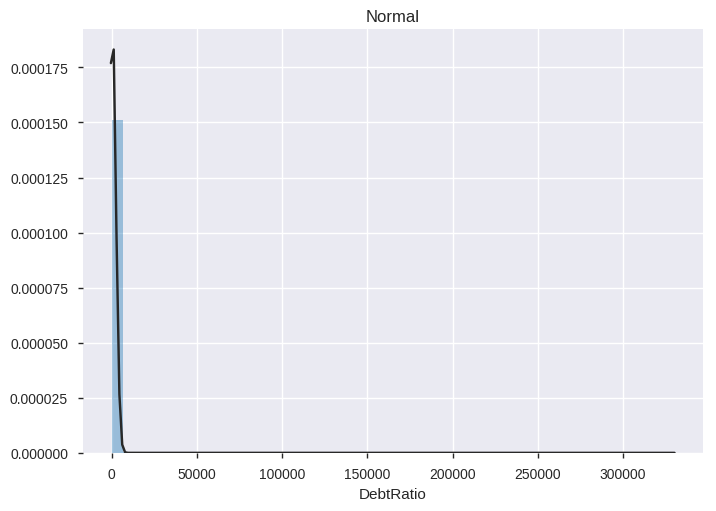

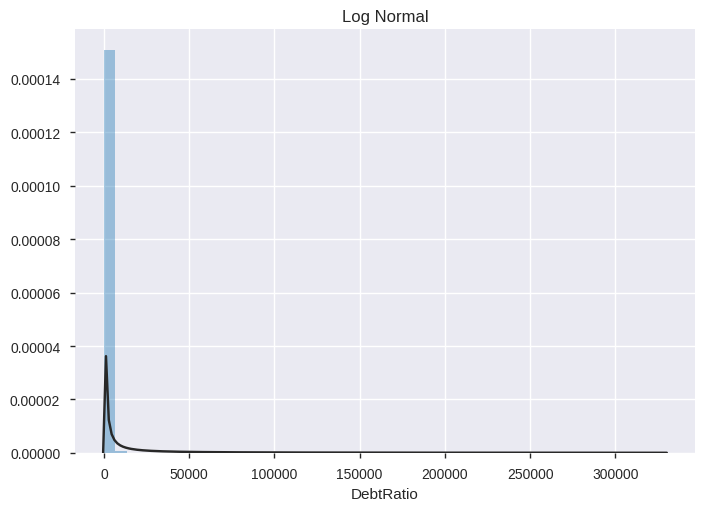

In [30]:
import scipy.stats as st
y = df['DebtRatio']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [10]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

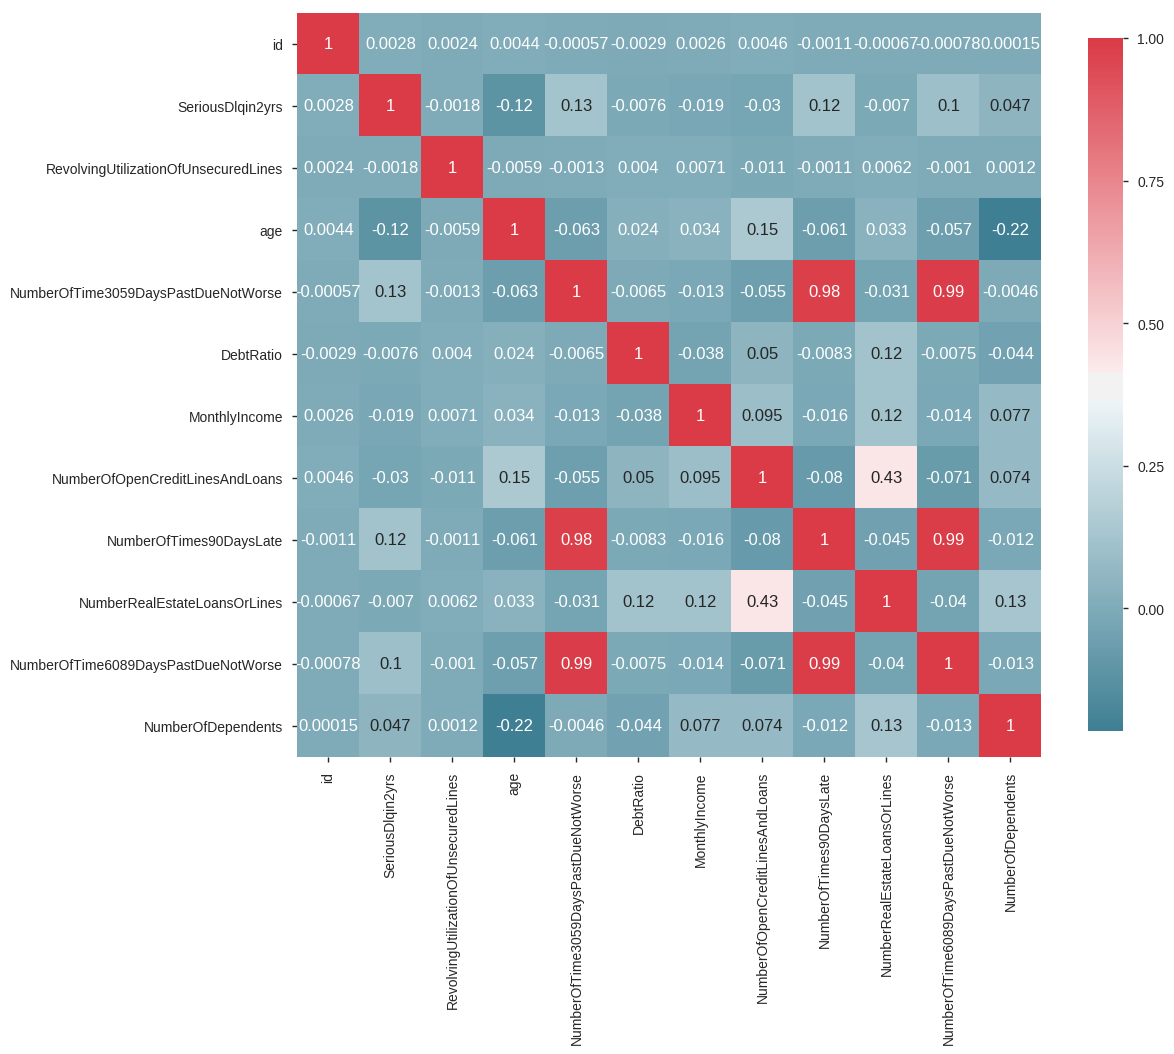

In [11]:
plot_correlation_map( df )

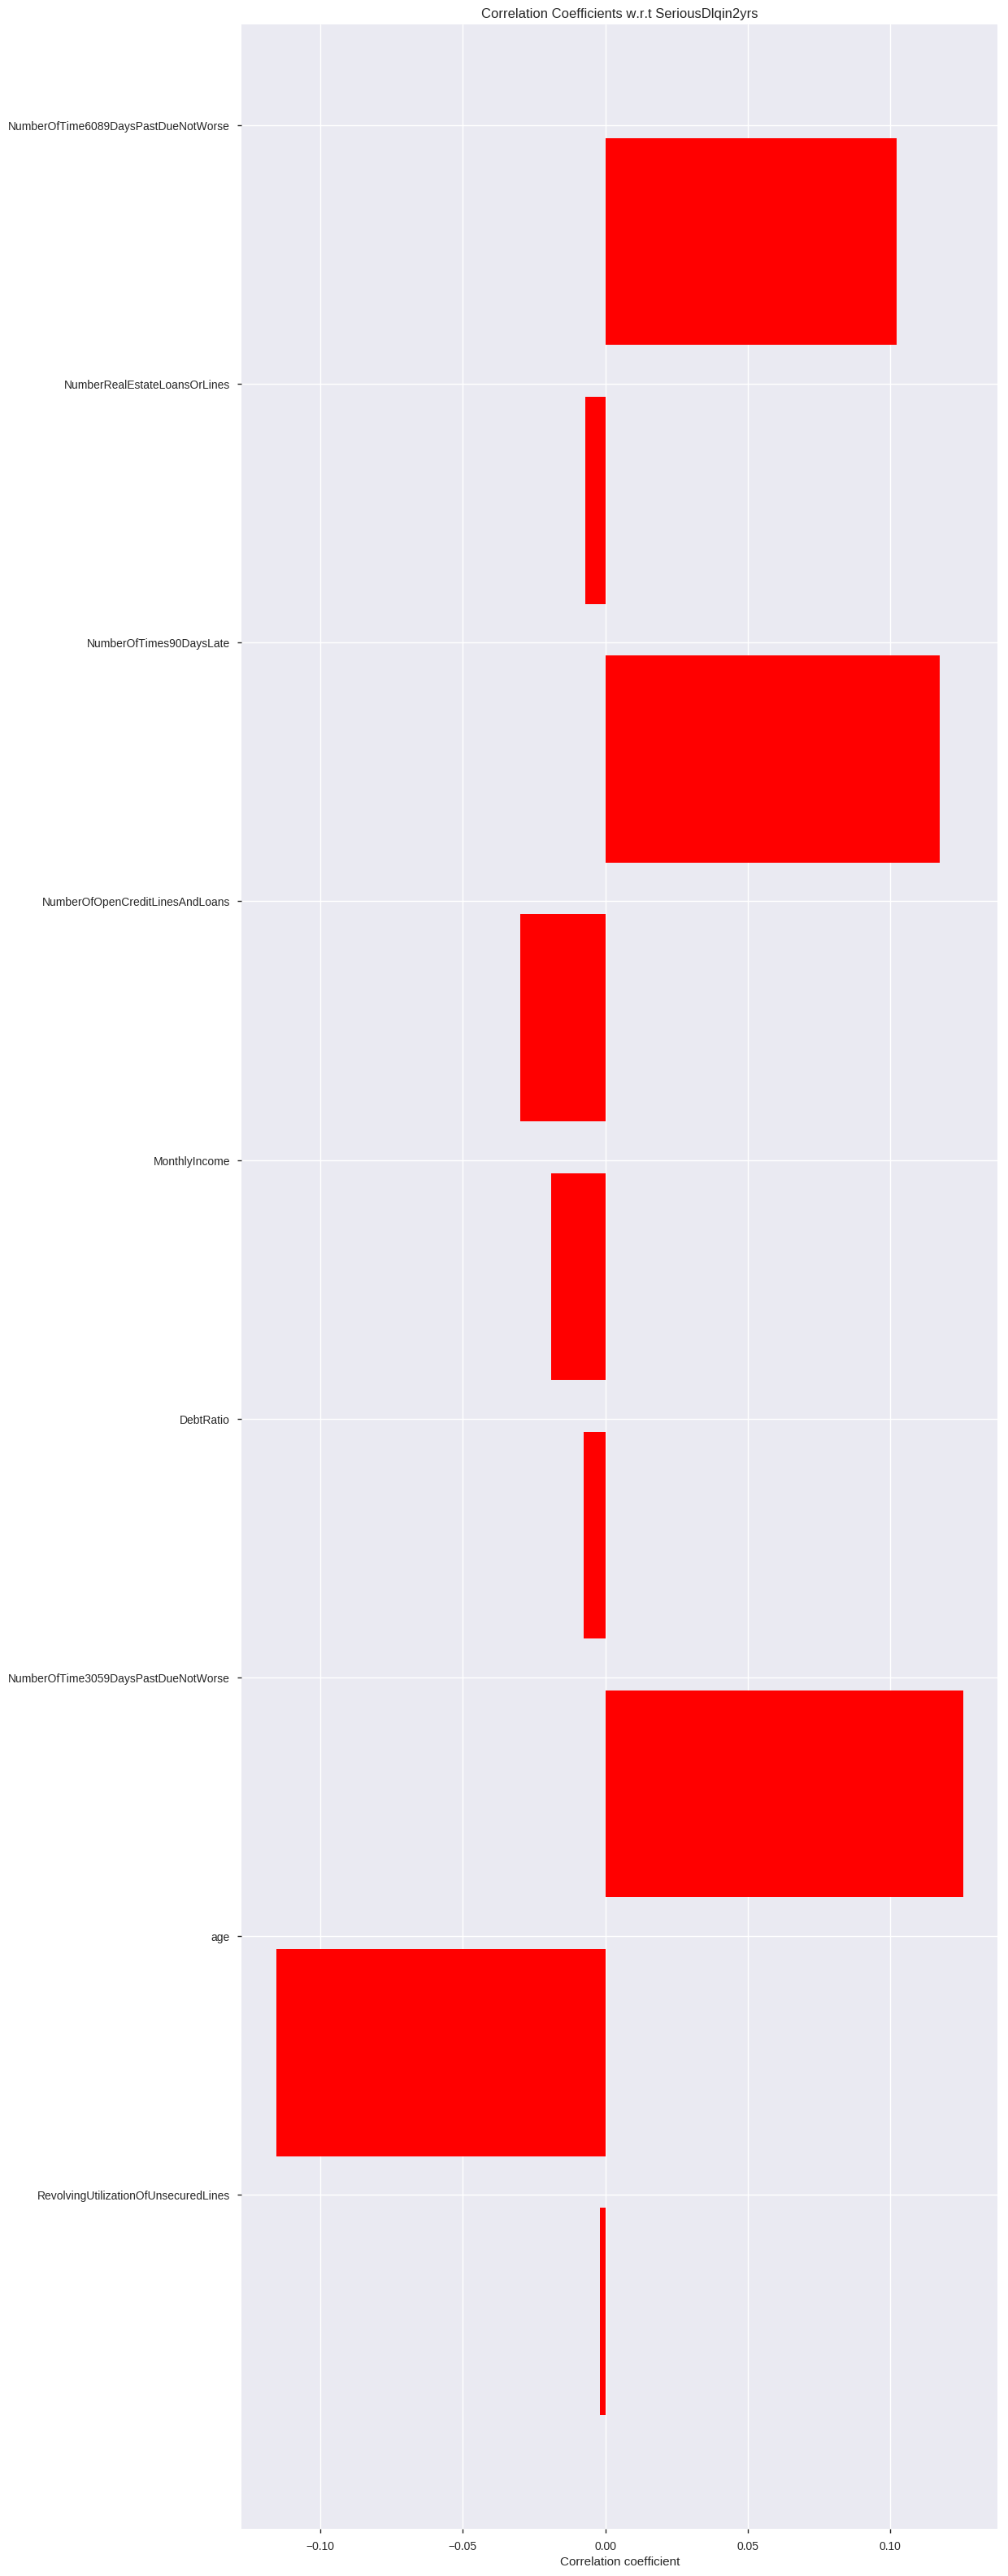

In [17]:
#plotting correlations
num_feat=df.columns[df.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df.SeriousDlqin2yrs.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t SeriousDlqin2yrs");

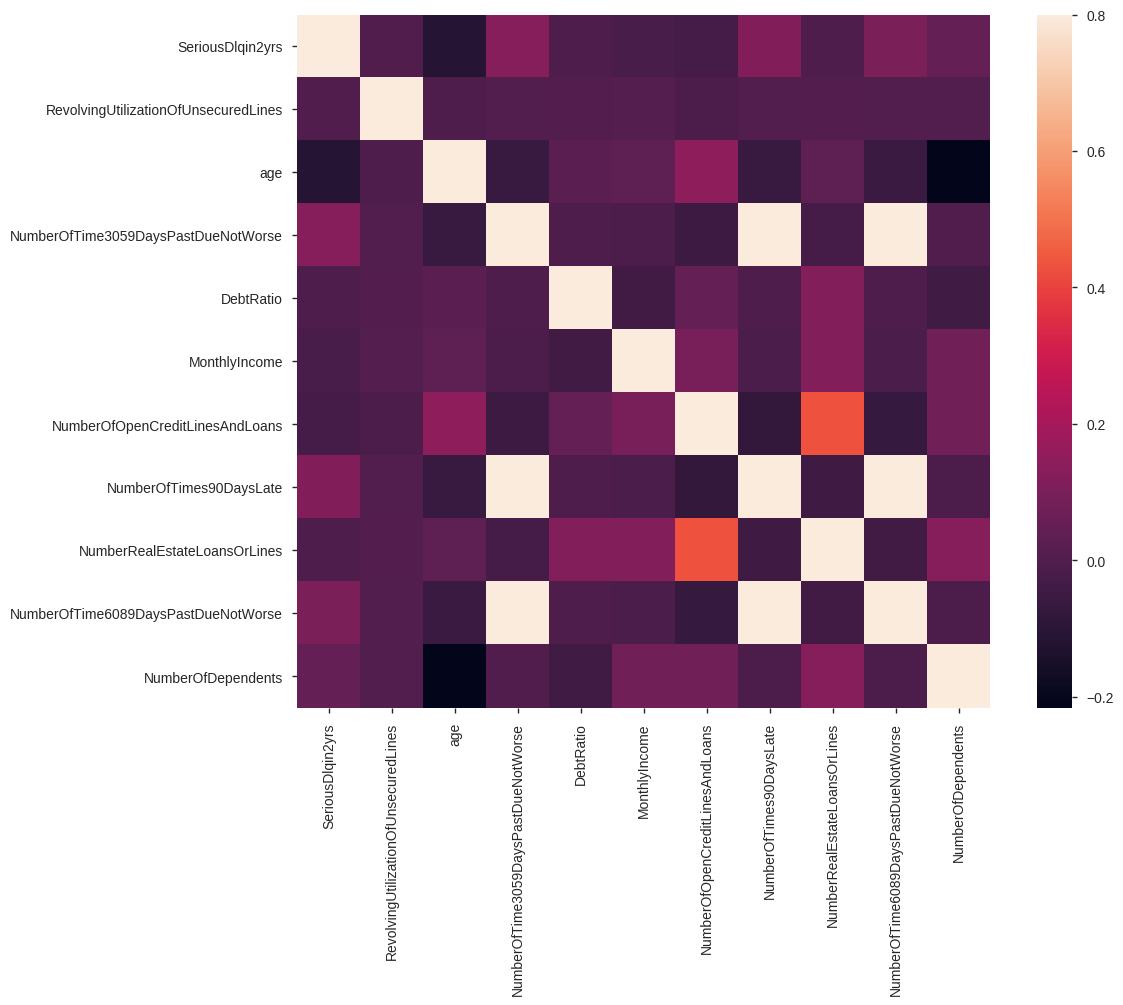

In [18]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [12]:
df.columns

Index([u'id', u'SeriousDlqin2yrs', u'RevolvingUtilizationOfUnsecuredLines',
       u'age', u'NumberOfTime3059DaysPastDueNotWorse', u'DebtRatio',
       u'MonthlyIncome', u'NumberOfOpenCreditLinesAndLoans',
       u'NumberOfTimes90DaysLate', u'NumberRealEstateLoansOrLines',
       u'NumberOfTime6089DaysPastDueNotWorse', u'NumberOfDependents'],
      dtype='object')

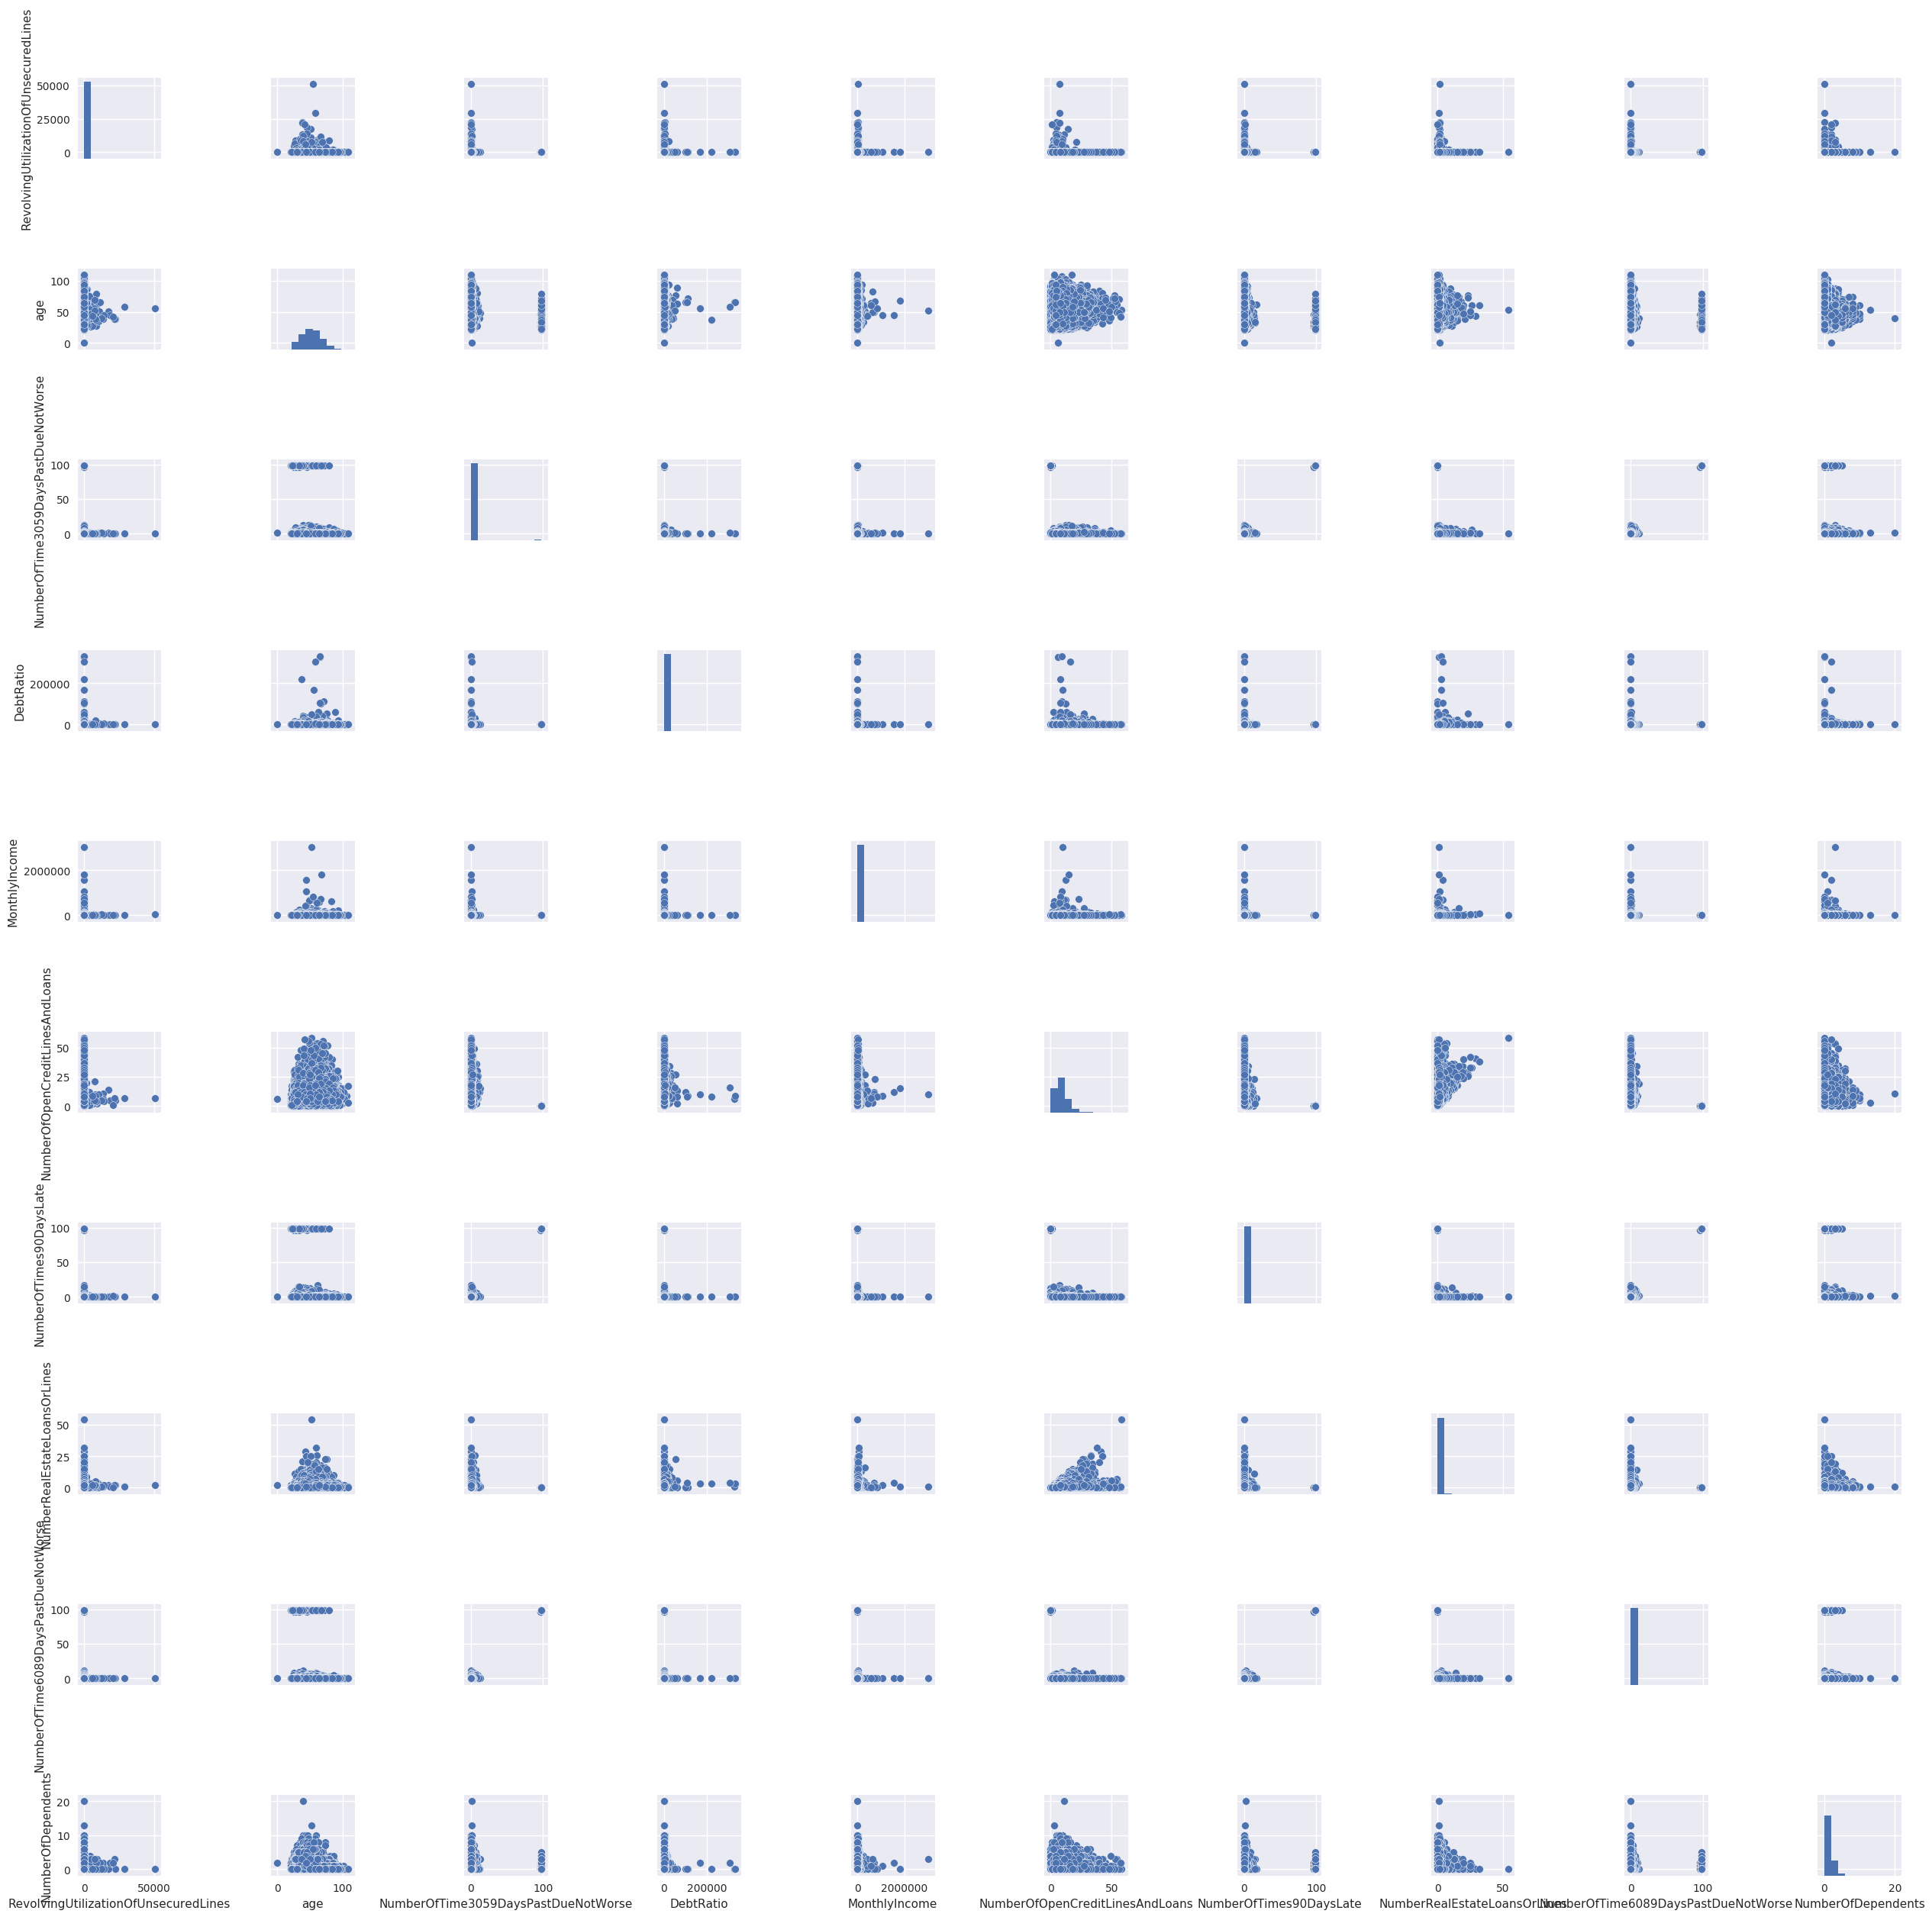

In [19]:
#scatterplot
sns.set()
cols = ['RevolvingUtilizationOfUnsecuredLines',
       'age', 'NumberOfTime3059DaysPastDueNotWorse','DebtRatio',
       'MonthlyIncome','NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines',
       'NumberOfTime6089DaysPastDueNotWorse','NumberOfDependents']
sns.pairplot(df[cols], size = 2.5, hue="SeriousDlqin2yrs")
plt.show();

### Violin plots

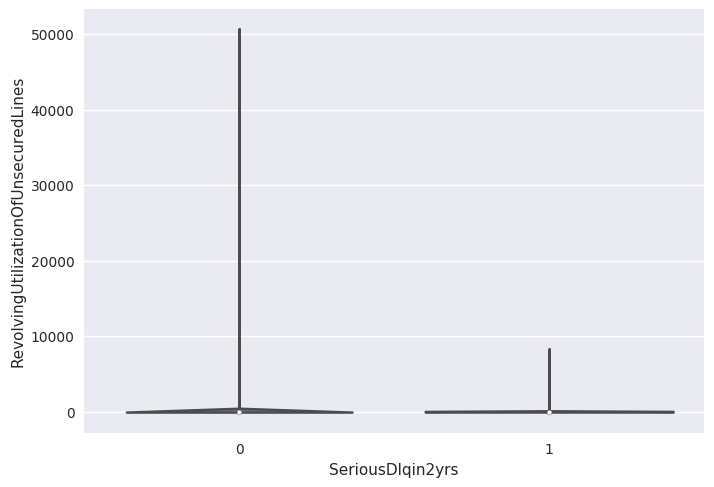

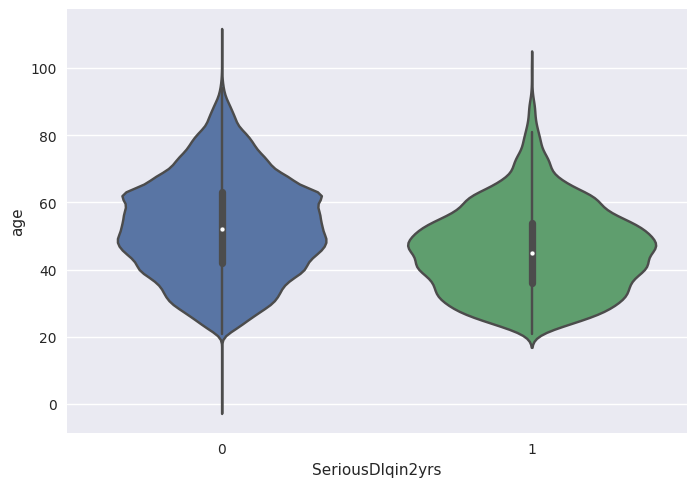

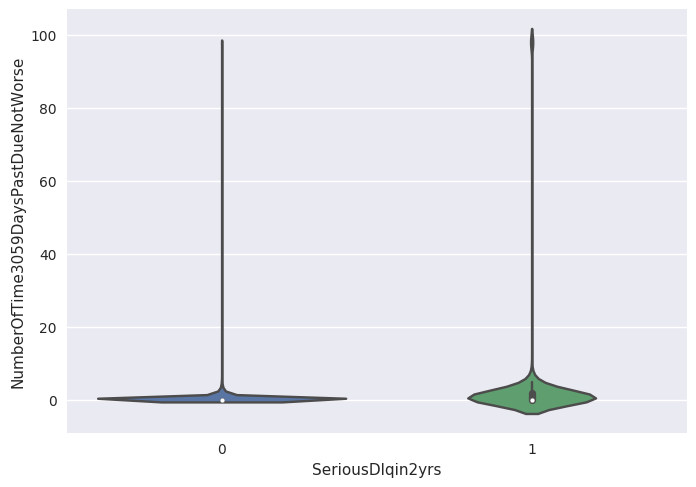

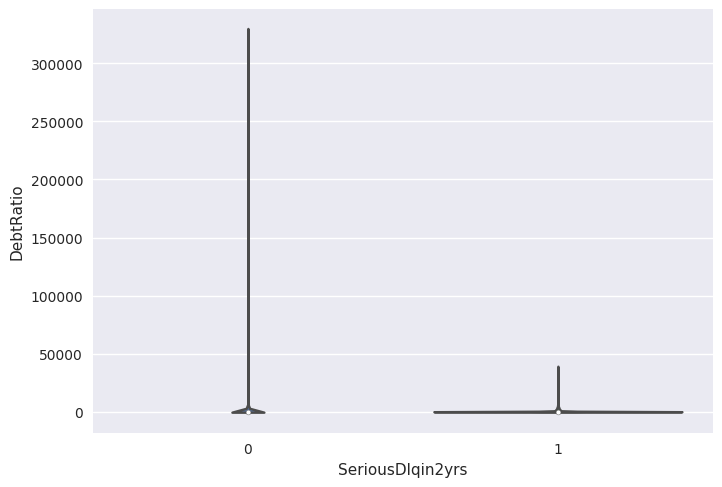

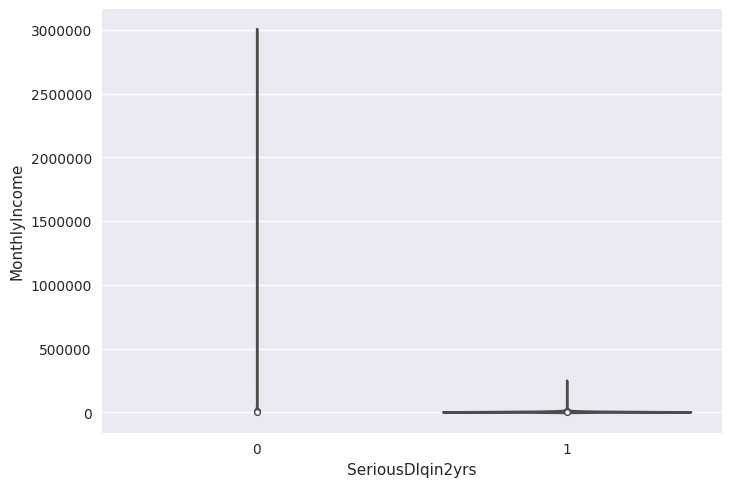

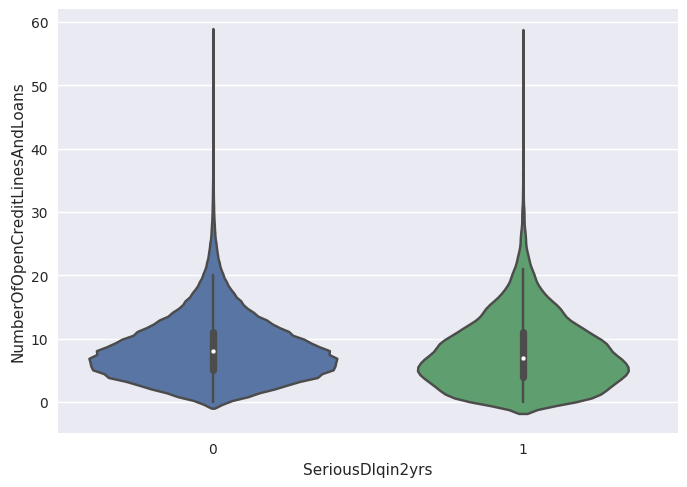

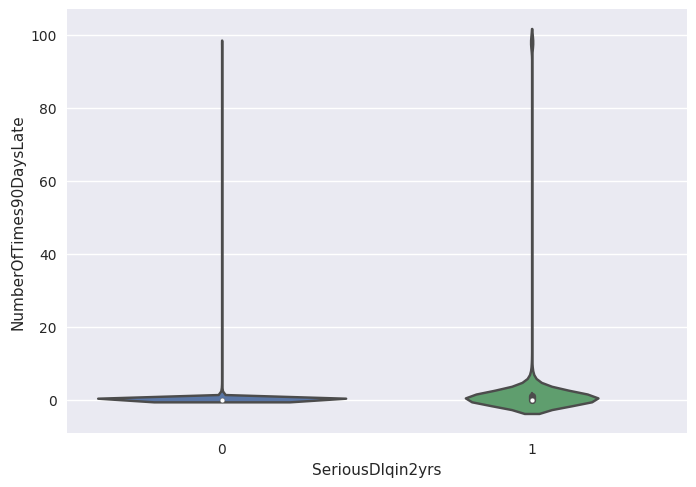

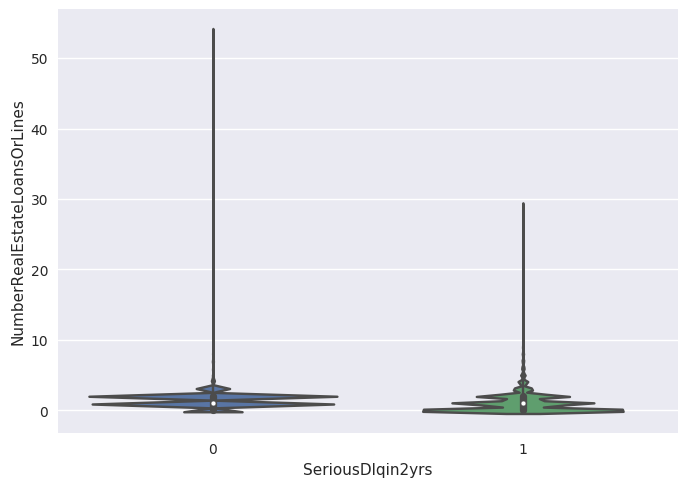

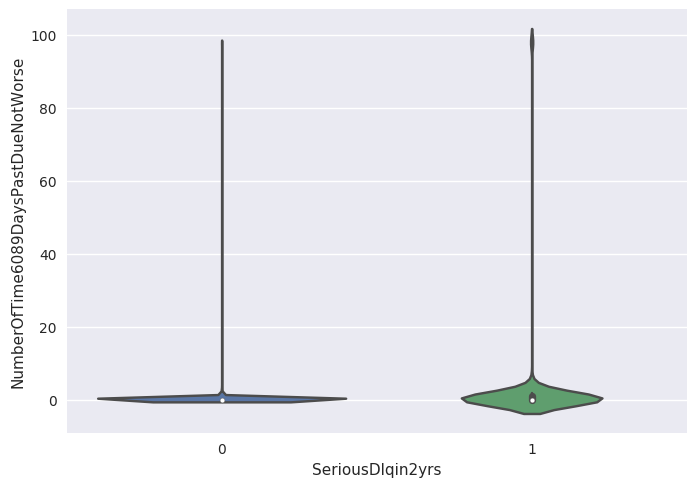

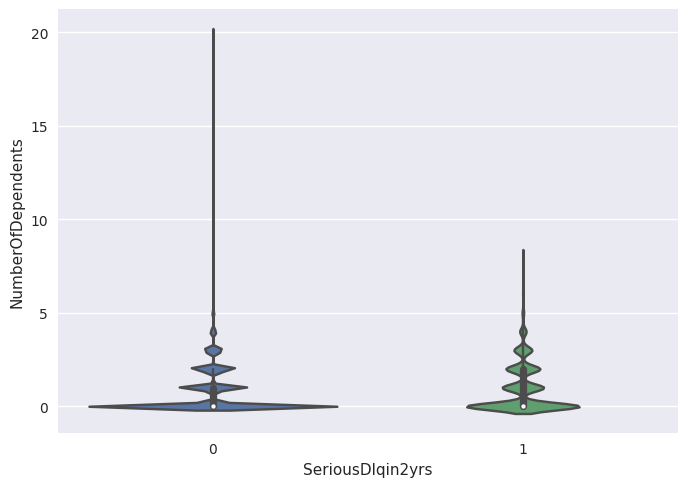

In [20]:
for f in [_ for _ in df.columns if _ not in ['id','SeriousDlqin2yrs']]:
    sns.violinplot(x="SeriousDlqin2yrs", y=f, data=df.fillna(-1))
    plt.show()

#  
#  
#  PCA/SVD (nan = -1)

### PCA

In [47]:
features_without_nan = [f for f in features if f not in features_with_nan]
                                      
pca = PCA(n_components=2)
#pca.fit()

components = pca.fit_transform(df[features_without_nan].fillna(-1))
component1 = components[:,0]
component2 = components[:,1]


In [48]:
print(pca.explained_variance_ratio_) 

[ 0.98513189  0.01479742]


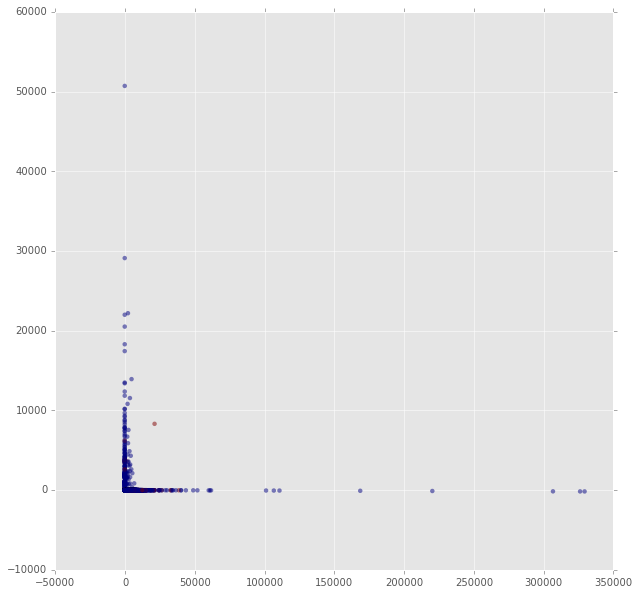

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(component1,
            component2,
            c=df["SeriousDlqin2yrs"],
            edgecolor='None',
            alpha=0.5)
plt.show()

### SVD

In [50]:
svd = TruncatedSVD(n_components=2)

components = svd.fit_transform(df[features_without_nan].fillna(-1))
component1 = components[:,0]
component2 = components[:,1]

In [51]:
print(svd.explained_variance_ratio_) 

[ 0.98511284  0.0147973 ]


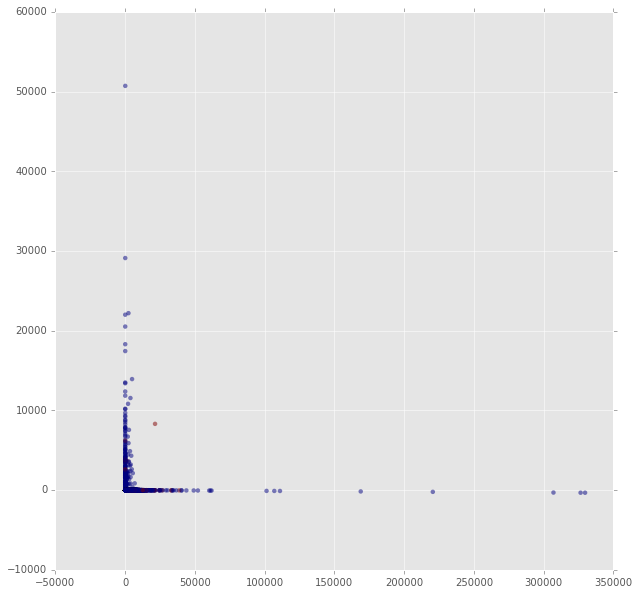

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(component1,
            component2,
            c=df["SeriousDlqin2yrs"],
            edgecolor='None',
            alpha=0.5)
plt.show()

In [21]:
df.columns

Index([u'SeriousDlqin2yrs', u'RevolvingUtilizationOfUnsecuredLines', u'age',
       u'NumberOfTime3059DaysPastDueNotWorse', u'DebtRatio', u'MonthlyIncome',
       u'NumberOfOpenCreditLinesAndLoans', u'NumberOfTimes90DaysLate',
       u'NumberRealEstateLoansOrLines', u'NumberOfTime6089DaysPastDueNotWorse',
       u'NumberOfDependents'],
      dtype='object')

In [23]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
quantitative.remove('SeriousDlqin2yrs')

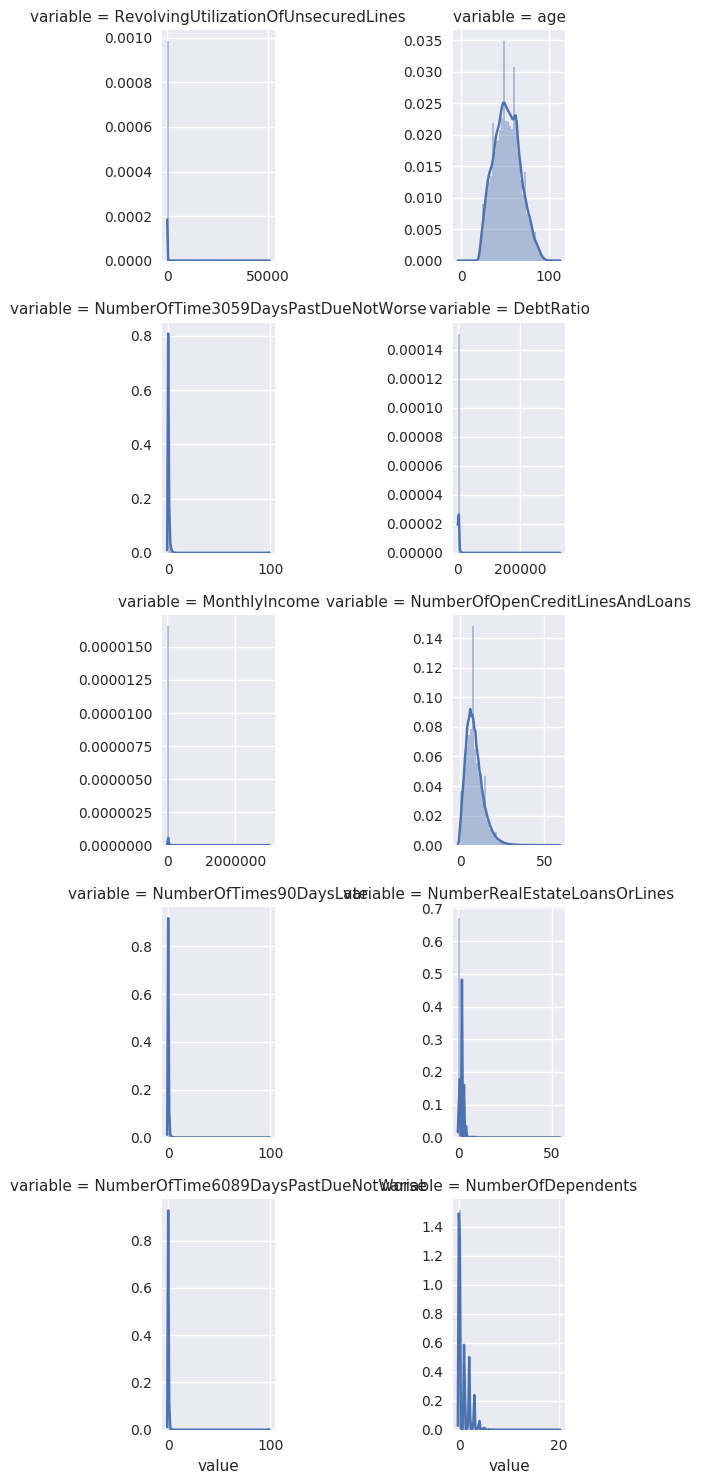

In [24]:
f = pd.melt(df, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

#  
#  
# Check distribution of train vs test data

In [9]:
df_toPredict = pd.read_csv('cs-test.csv')

In [10]:
df_toPredict.head()

Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1               NaN                              0.885519   43   
1           2               NaN                              0.463295   57   
2           3               NaN                              0.043275   59   
3           4               NaN                              0.280308   38   
4           5               NaN                              1.000000   27   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     0   0.177513         5700.0   
1                                     0   0.527237         9141.0   
2                                     0   0.687648         5083.0   
3                                     1   0.925961         3200.0   
4                                     0   0.019917         3865.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                4                        0   
1                               15                        0   
2                               12                        0   
3                                7                        0   
4                                4                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             0                                     0   
1                             4                                     0   
2                             1                                     0   
3                             2                                     0   
4                             0                                     0   

   NumberOfDependents  
0                 0.0  
1                 2.0  
2                 2.0  
3                 0.0  
4                 1.0

In [14]:
for c in df_toPredict.columns:
    nan_count = len(df_toPredict[df_toPredict[c].isnull()])
    if nan_count>0:
        print(c, nan_count, 1.0*nan_count/len(df))

('SeriousDlqin2yrs', 101503, 0.6766866666666667)
('MonthlyIncome', 20103, 0.13402)
('NumberOfDependents', 2626, 0.017506666666666667)


In [6]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [7]:
df_subsampled = df[0:1000]

trace = go.Scatter(
    y = df_subsampled['age'].values,
    x = df_subsampled['MonthlyIncome'].values,
    mode='markers',
    marker=dict(
        size= df_subsampled['DebtRatio'].values *0.001,
        color = df_subsampled['SeriousDlqin2yrs'].values,
        colorscale='Portland',
        showscale=True,
        opacity=0.5,
        colorbar = dict(title = 'SeriousDlqin2yrs')
    ),
    text = np.round(df_subsampled['DebtRatio'].values, decimals=2)
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of Monthly Income v/s Age',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'age',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterWords')
